# First Data Analyse

In [3]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from numpy import array, zeros
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Data cleaning and fitting
# retrive from here https://www.kaggle.com/datasets/stackoverflow/stacksample/data
raw_answers: DataFrame = read_csv('./data/Answers.csv', encoding='latin-1')
raw_questions: DataFrame = read_csv('./data/Questions.csv', encoding='latin-1')
raw_tags: DataFrame = read_csv('./data/Tags.csv', encoding='latin-1')
questions = raw_questions.copy()
answers = raw_answers.copy()
tags = raw_tags.copy()
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.reset_index()
tags = tags.groupby('Id')['Tag'].apply(list).reset_index()
questions = questions.join(tags['Tag'], on='Id')

# Keep only top 10 tags
top_tags = tags['Tag'].explode().value_counts().nlargest(20).index

# Drop NaN values
questions = questions.dropna(subset=['Tag'])

# Remove rows with tags not in top_tags
questions = questions[questions['Tag'].apply(lambda tags: any(tag in top_tags for tag in tags))]
questions.reset_index()
# Force print all 

# questions


,index,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[java, windows, swt, executable, software-dist..."
1,4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[sql, stored-procedures, db2]"
2,5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[ruby-on-rails, ruby]"
3,6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,"[.net, wcf]"
4,7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,"[io, java]"
...,...,...,...,...,...,...,...,...,...
15615,23366,1263960,73450.0,2009-08-12T02:45:29Z,NaN,8,"generate a ""create table"" sql command based on...",<p>I have a mysql shell but for security reaso...,"[javascript, php, html, html5, facebook]"
15616,23367,1263980,NaN,2009-08-12T02:54:36Z,NaN,0,Test For Password Protected Folder,<p>How do I use PHP to check whether a folder ...,"[ios, xamarin.ios]"
15617,23368,1263990,826.0,2009-08-12T02:58:20Z,NaN,0,How does a user control pass focus to a contro...,<p>I'm working on a user control that will acc...,"[c#, wpf, office-interop]"
15618,23371,1264150,40906.0,2009-08-12T03:59:31Z,NaN,1,How to catch errors elegantly and keep methods...,<p>I am in the process of writing a small(er) ...,"[ruby-on-rails, ruby, ubuntu, bundle, bundler]"


In [3]:
pd.set_option('display.max_columns', None)
questions

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[java, windows, swt, executable, software-dist..."
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[sql, stored-procedures, db2]"
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[ruby-on-rails, ruby]"
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,"[.net, wcf]"
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,"[io, java]"
...,...,...,...,...,...,...,...,...
23366,1263960,73450.0,2009-08-12T02:45:29Z,NaN,8,"generate a ""create table"" sql command based on...",<p>I have a mysql shell but for security reaso...,"[javascript, php, html, html5, facebook]"
23367,1263980,NaN,2009-08-12T02:54:36Z,NaN,0,Test For Password Protected Folder,<p>How do I use PHP to check whether a folder ...,"[ios, xamarin.ios]"
23368,1263990,826.0,2009-08-12T02:58:20Z,NaN,0,How does a user control pass focus to a contro...,<p>I'm working on a user control that will acc...,"[c#, wpf, office-interop]"
23371,1264150,40906.0,2009-08-12T03:59:31Z,NaN,1,How to catch errors elegantly and keep methods...,<p>I am in the process of writing a small(er) ...,"[ruby-on-rails, ruby, ubuntu, bundle, bundler]"


## Data cleaning and fitting

In [4]:
# creating copy before:
questions = raw_questions.copy()
answers = raw_answers.copy()
tags = raw_tags.copy()

In [4]:
# Verify years min and max
print(questions.CreationDate.min())
print(questions.CreationDate.max())
print(answers.CreationDate.min())
print(answers.CreationDate.max())


2008-08-01T13:57:07Z
2016-10-19T23:57:31Z
2008-08-01T14:45:37Z
2016-10-19T23:58:58Z


In [5]:
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.reset_index()
grouped_tags.head(5)

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [6]:
# make a list of tags and link it to questions
tags = tags.groupby('Id')['Tag'].apply(list).reset_index()
print(tags.head())
questions = questions.join(tags['Tag'], on='Id')

    Id                                                Tag
0   80                        [flex, actionscript-3, air]
1   90  [svn, tortoisesvn, branch, branching-and-merging]
2  120                            [sql, asp.net, sitemap]
3  180  [algorithm, language-agnostic, colors, color-s...
4  260       [c#, .net, scripting, compiler-construction]


In [7]:
# Display unique years
print(pd.to_datetime(questions['CreationDate']))
# Keep only top 10 tags
top_tags = tags['Tag'].explode().value_counts().nlargest(20).index
print(top_tags)

# Drop NaN values
questions = questions.dropna(subset=['Tag'])
print(questions['Tag'])
print()
print()
print()

# Remove rows with tags not in top_tags
questions = questions[questions['Tag'].apply(lambda tags: any(tag in top_tags for tag in tags))]
questions.reset_index()
# Force print all 
pd.set_option('display.max_columns', None)
questions


0         2008-08-01 13:57:07+00:00
1         2008-08-01 14:41:24+00:00
2         2008-08-01 15:50:08+00:00
3         2008-08-01 18:42:19+00:00
4         2008-08-01 23:22:08+00:00
                     ...           
1264211   2016-10-19 23:38:01+00:00
1264212   2016-10-19 23:48:09+00:00
1264213   2016-10-19 23:52:50+00:00
1264214   2016-10-19 23:55:24+00:00
1264215   2016-10-19 23:57:31+00:00
Name: CreationDate, Length: 1264216, dtype: datetime64[ns, UTC]
Index(['javascript', 'java', 'c#', 'php', 'android', 'jquery', 'python',
       'html', 'c++', 'ios', 'mysql', 'css', 'sql', 'asp.net', 'objective-c',
       'ruby-on-rails', '.net', 'c', 'iphone', 'angularjs'],
      dtype='object', name='Tag')
0        [java, windows, swt, executable, software-dist...
1                           [linux, vmware, sysadmin, nic]
2                            [sql-server, sql-server-2005]
3                                                    [api]
4                            [sql, stored-procedures, db2]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[java, windows, swt, executable, software-dist..."
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[sql, stored-procedures, db2]"
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[ruby-on-rails, ruby]"
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,"[.net, wcf]"
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,"[io, java]"
...,...,...,...,...,...,...,...,...
23366,1263960,73450.0,2009-08-12T02:45:29Z,NaN,8,"generate a ""create table"" sql command based on...",<p>I have a mysql shell but for security reaso...,"[javascript, php, html, html5, facebook]"
23367,1263980,NaN,2009-08-12T02:54:36Z,NaN,0,Test For Password Protected Folder,<p>How do I use PHP to check whether a folder ...,"[ios, xamarin.ios]"
23368,1263990,826.0,2009-08-12T02:58:20Z,NaN,0,How does a user control pass focus to a contro...,<p>I'm working on a user control that will acc...,"[c#, wpf, office-interop]"
23371,1264150,40906.0,2009-08-12T03:59:31Z,NaN,1,How to catch errors elegantly and keep methods...,<p>I am in the process of writing a small(er) ...,"[ruby-on-rails, ruby, ubuntu, bundle, bundler]"


In [ ]:
# # make a user dataset with answer and tags to the attached questions
# answers_tmp = answers.join(tags['Tag'], on='ParentId')
# most_frequent_users = answers['OwnerUserId'].value_counts()
# limit = most_frequent_users.quantile(0.9) # selection 90% best active users for answers
# most_frequent_users[most_frequent_users > limit]

# print(most_frequent_users.head())

OwnerUserId
22656.0      3270
1144035.0    3009
29407.0      2144
548225.0     1924
115145.0     1813
Name: count, dtype: int64


Text(0, 0.5, 'Number of answers')

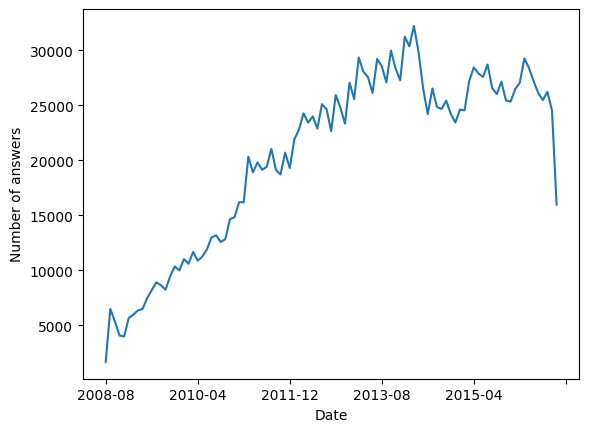

In [8]:
# Make plot reponce and answer by time group by month
answers_month = answers.copy()
answers_month['CreationDate'] = answers_month['CreationDate'].str[:7]
plot = answers_month['CreationDate'].value_counts().sort_index().plot()
plot.set_xlabel('Date')
plot.set_ylabel('Number of answers')

               Id  OwnerUserId CreationDate  ParentId  Score  \
1029093  19105819    2751573.0   2013-10-01  19067570      0   
1029094  19105833    1519058.0   2013-10-01  19105770      1   
1029095  19105837    1642266.0   2013-10-01  19088480      0   
1029096  19105841    2526212.0   2013-10-01  19105620      4   
1029097  19105901      10474.0   2013-10-01    897630     -1   

                                                      Body  
1029093  <p>Cognos ships with Tomcat. If you follow the...  
1029094  <p>you must use a delimiter in your function.....  
1029095  <p>Alright, problem solved. After trying out v...  
1029096  <p>This is what I came up with:</p>\n\n<h3>UPD...  
1029097  <p>I'm going to share my own simple option par...  


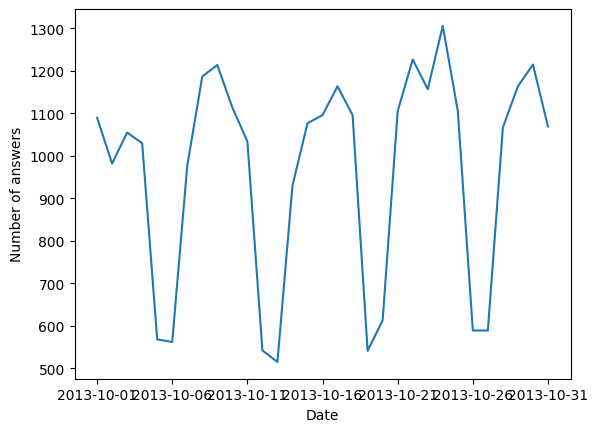

In [9]:
answers_2013_08 = answers.copy()
# Keep only creation date contain 2013-10
answers_2013_08 = answers_2013_08[answers_2013_08['CreationDate'].str.contains('2013-10')]
answers_2013_08['CreationDate'] = answers_2013_08['CreationDate'].str[:10]
print(answers_2013_08.head())
plot = answers_2013_08['CreationDate'].value_counts().sort_index().plot()
plot.set_xlabel('Date')
plot.set_ylabel('Number of answers')
plt.show()


Text(0, 0.5, 'Number of answers')

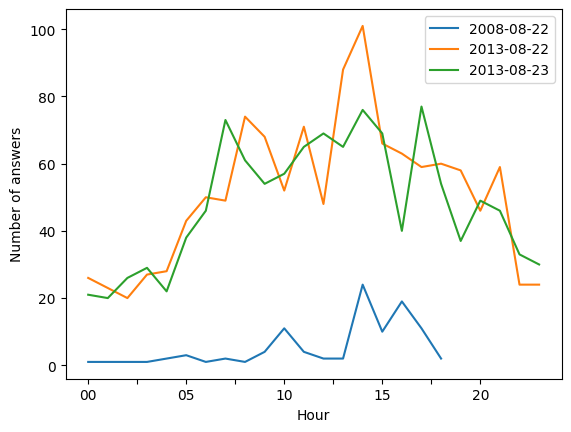

In [8]:
answers_2013_08_22 = answers.copy()
answers_2013_08_22 = answers_2013_08_22[answers_2013_08_22['CreationDate'].str.contains('2013-10-22')]
answers_2013_08_22['CreationDate'] = answers_2013_08_22['CreationDate'].str[11:13]

answers_2013_08_23 = answers.copy()
answers_2013_08_23 = answers_2013_08_23[answers_2013_08_23['CreationDate'].str.contains('2013-10-23')]
answers_2013_08_23['CreationDate'] = answers_2013_08_23['CreationDate'].str[11:13]

answers_2008_08_22 = answers.copy()
answers_2008_08_22 = answers_2008_08_22[answers_2008_08_22['CreationDate'].str.contains('2008-08-22')]
answers_2008_08_22['CreationDate'] = answers_2008_08_22['CreationDate'].str[11:13]

ax = answers_2008_08_22['CreationDate'].value_counts().sort_index().plot()
ax = answers_2013_08_22['CreationDate'].value_counts().sort_index().plot()
ax = answers_2013_08_23['CreationDate'].value_counts().sort_index().plot()
ax.legend(['2008-08-22', '2013-08-22', '2013-08-23'])
ax.set_xlabel('Hour')
ax.set_ylabel('Number of answers')


Text(0, 0.5, 'Number of answers')

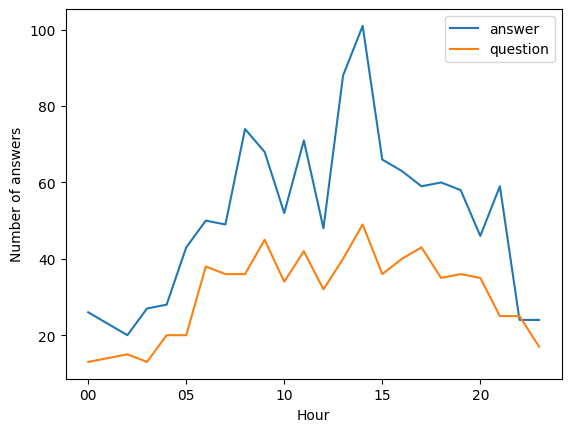

In [9]:
questions_2013_08_22 = questions.copy()
questions_2013_08_22 = questions_2013_08_22[questions_2013_08_22['CreationDate'].str.contains('2013-10-22')]
questions_2013_08_22['CreationDate'] = questions_2013_08_22['CreationDate'].str[11:13]


ax = answers_2013_08_22['CreationDate'].value_counts().sort_index().plot()
ax = questions_2013_08_22['CreationDate'].value_counts().sort_index().plot()
ax.legend(['answer', 'question'])
ax.set_xlabel('Hour')
ax.set_ylabel('Number of answers')

Text(0, 0.5, 'Number of questions')

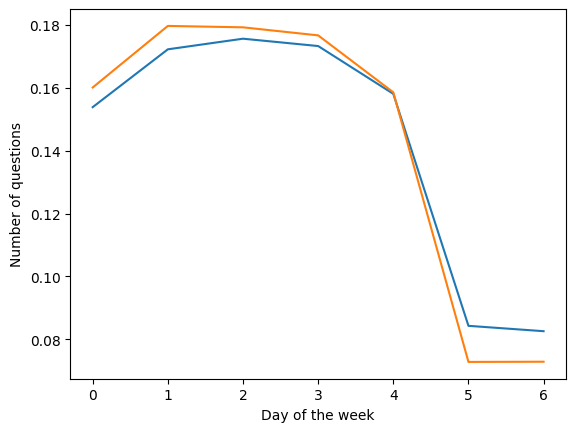

In [ ]:
# question_moy_by_day = questions.copy()
# answers_moy_by_day = answers.copy()
# question_moy_by_day['CreationDate'] = question_moy_by_day['CreationDate'].str[:10]
# answers_moy_by_day['CreationDate'] = answers_moy_by_day['CreationDate'].str[:10]
# # Find day (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, SunDay) with date
# # question_moy_by_day['CreationDate'] = question_moy_by_day['CreationDate'].apply(lambda x: x.split('-'))
# # question_moy_by_day['CreationDate'] = question_moy_norm_by_day['CreationDate'].apply(lambda x: x[0] + '-' + x[1] + '-' + x[2])
# question_moy_norm_by_day['CreationDate'] = question_moy_norm_by_day['CreationDate'].apply(lambda x: pd.Timestamp(x).dayofweek)
# answers_moy_norm_by_day['CreationDate'] = answers_moy_norm_by_day['CreationDate'].apply(lambda x: pd.Timestamp(x).dayofweek)
# question_moy_norm_by_day_for_plot = question_moy_norm_by_day['CreationDate'].value_counts().sort_index()
# answers_moy_norm_by_day_for_plot = answers_moy_norm_by_day['CreationDate'].value_counts().sort_index()
# question_moy_norm_by_day_for_plot = question_moy_norm_by_day_for_plot / question_moy_norm_by_day_for_plot.sum()
# answers_moy_norm_by_day_for_plot = answers_moy_norm_by_day_for_plot / answers_moy_norm_by_day_for_plot.sum()
# ax = answers_moy_norm_by_day_for_plot.plot()
# ax = question_moy_norm_by_day_for_plot.plot()
# ax.set_xlabel('Day of the week')
# ax.set_ylabel('Number of questions')



# Trend seasonality and residuals

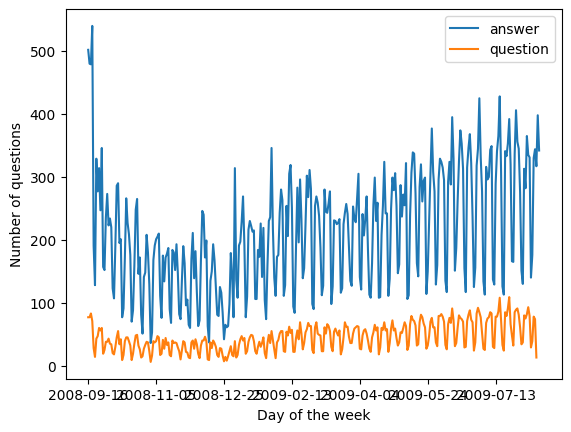

In [5]:
question_moy_by_day = questions.copy()
answers_moy_by_day = answers.copy()
question_moy_by_day['CreationDate'] = question_moy_by_day['CreationDate'].str[:10]
answers_moy_by_day['CreationDate'] = answers_moy_by_day['CreationDate'].str[:10]
# Keep only creation date before 2010
answers_moy_by_day = answers_moy_by_day[answers_moy_by_day['CreationDate'] < '2009-08-15']
question_moy_by_day = question_moy_by_day[question_moy_by_day['CreationDate'] < '2009-08-15']

# Keep only creation date after 2008-09
answers_moy_by_day = answers_moy_by_day[answers_moy_by_day['CreationDate'] > '2008-09-15']
question_moy_by_day = question_moy_by_day[question_moy_by_day['CreationDate'] > '2008-09-15']

question_moy_by_day_for_plot = question_moy_by_day['CreationDate'].value_counts().sort_index()
answers_moy_by_day_for_plot = answers_moy_by_day['CreationDate'].value_counts().sort_index()


ax = answers_moy_by_day_for_plot.plot()
ax = question_moy_by_day_for_plot.plot()
# shape plot bigger on x axis
# plt.xlim(0, 100)
ax.legend(['answer', 'question'])
ax.set_xlabel('Day of the week')
ax.set_ylabel('Number of questions')

# save plot
plt.savefig('plot.png')



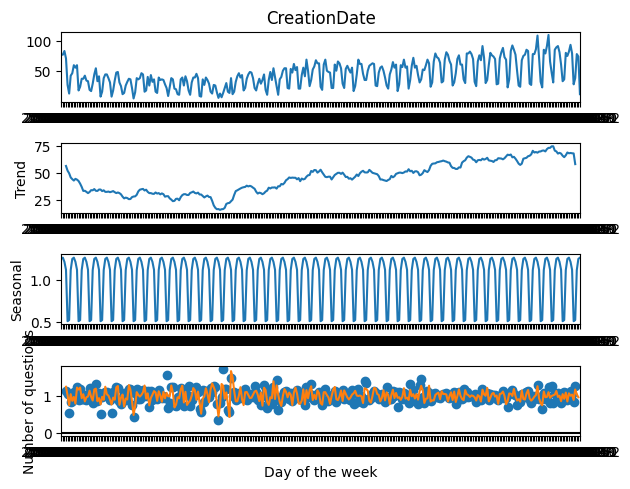

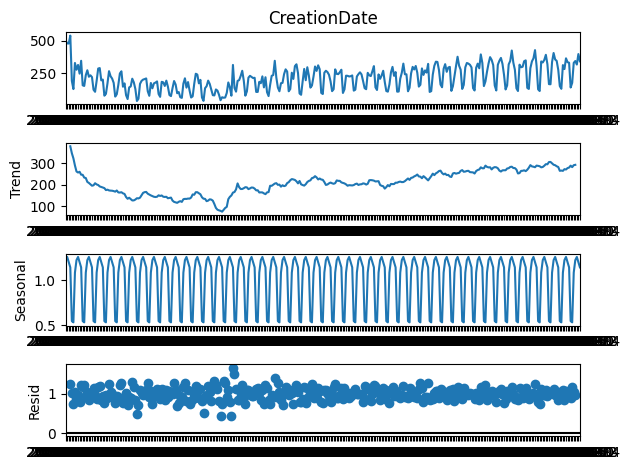

In [22]:
question_trend = question_moy_by_day_for_plot.copy()
decompose_result_mult = seasonal_decompose(question_trend, model='multiplicative', period=7)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
plt.savefig('decompose_question_result_mult.png')


answer_trend = answers_moy_by_day_for_plot.copy()
# could not convert string to float: '2008-09-16'
decompose_result_mult = seasonal_decompose(answer_trend, model='multiplicative', period=7)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

# Plot residual
ax = residual.plot()
ax.set_xlabel('Day of the week')
ax.set_ylabel('Number of questions')
plt.savefig('residual_answer.png')

decompose_result_mult.plot()
plt.savefig('decompose_answer_result_mult.png')



2008-09-16         NaN
2008-09-17         NaN
2008-09-18         NaN
2008-09-19    1.246687
2008-09-20    1.011265
                ...   
2009-08-10    1.044234
2009-08-11    0.959850
2009-08-12         NaN
2009-08-13         NaN
2009-08-14         NaN
Name: resid, Length: 333, dtype: float64
2008-09-16         NaN
2008-09-17         NaN
2008-09-18         NaN
2008-09-19    1.246687
2008-09-20    1.128976
                ...   
2009-08-10    1.053818
2009-08-11    1.006834
2009-08-12    1.006834
2009-08-13    1.006834
2009-08-14    1.006834
Name: resid, Length: 333, dtype: float64
2008-11-01     36
2008-12-25     42
2008-12-27     61
2009-01-02    314
Name: CreationDate, dtype: int64
DatetimeIndex(['2008-11-01', '2008-12-25', '2008-12-27', '2009-01-02'], dtype='datetime64[ns]', freq=None)


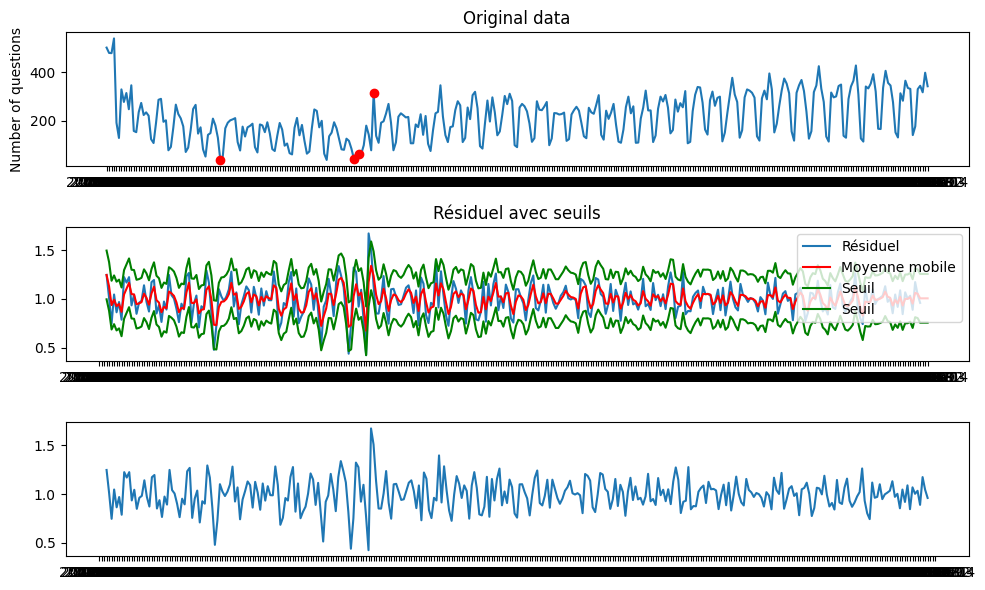

In [ ]:
# Moving average

window_size = 7
# moving_average = np.convolve(residual, np.ones(window_size)/window_size, mode='full')

print(residual)

numbers_series = pd.Series(residual)
 
# Get the moving averages of series
# of observations till the current time
moving_averages = round(numbers_series.ewm(
  alpha=0.5, adjust=False).mean(), 7)
 
# Convert pandas series back to list
moving_averages_list = moving_averages.tolist()

print(moving_averages)

# Define threshold for anomaly detection

threshold = 0.25

# Detect anomalies

anomalies = answer_trend[np.abs(residual - moving_averages) > threshold]
print(anomalies)
# Add index to the anomalies to get the date
anomalies_index = anomalies.index
anomalies_index = pd.to_datetime(anomalies_index)

print (anomalies_index)
# Rename Index to Date

distance = np.abs(residual - moving_averages)
# For each anomalies print value and means of the residual coresponding
# for i, date in enumerate(anomalies_index):
#     print(i)
#     print(f'Anomalie détectée le {date} avec une valeur de {anomalies[i]} et une moyenne de {moving_averages[date]}')

# Plot original data and in 2nd plot the residual and moving average and threshold
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(answer_trend)
ax[0].plot(anomalies, 'ro')
ax[0].set_ylabel('Number of questions')
ax[0].set_title('Original data')
ax[1].plot(residual, label='Résiduel')
ax[1].plot(moving_averages, 'r', label='Moyenne mobile')
ax[1].plot(moving_averages + threshold, 'g', label='Seuil')
ax[1].plot(moving_averages - threshold, 'g', label='Seuil')
ax[1].set_title('Résiduel avec seuils')
ax[1].set_ylabel('')
ax[1].legend()
ax[2].plot(residual)

plt.tight_layout()

plt.savefig('anomalies.png')



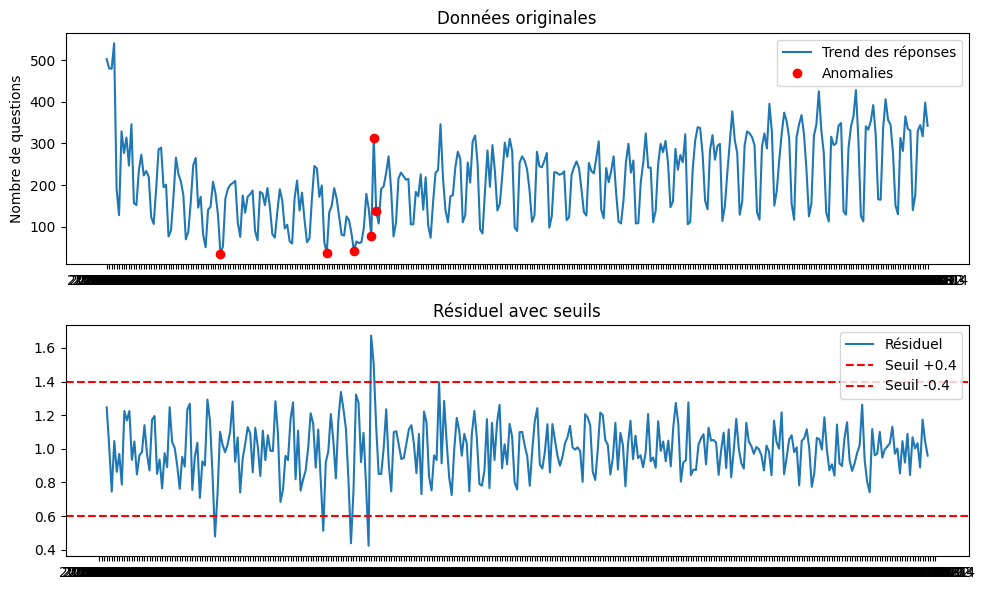

2009-01-02    314
2009-01-03    137
2008-11-01     36
2008-12-14     37
2008-12-25     42
2009-01-01     77
Name: CreationDate, dtype: int64


In [46]:
# Seuil pour la détection d'anomalies
threshold = 0.4
anomalies = np.where(residual > 1 + threshold)[0]
anomalies = np.concatenate((anomalies, np.where(residual < 1 - threshold)[0]))

# Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Tracé des données originales avec les anomalies
ax[0].plot(answer_trend, label='Trend des réponses')
ax[0].plot(anomalies, answer_trend[anomalies], 'ro', label='Anomalies')  # Points rouges aux indices des anomalies
ax[0].set_ylabel('Nombre de questions')
ax[0].set_title('Données originales')
ax[0].legend()

# Tracé du résiduel avec les lignes de seuil
ax[1].plot(residual, label='Résiduel')
ax[1].axhline(1 + threshold, color='r', linestyle='--', label=f'Seuil +{threshold}')
ax[1].axhline(1 - threshold, color='r', linestyle='--', label=f'Seuil -{threshold}')
ax[1].set_title('Résiduel avec seuils')
ax[1].legend()

plt.tight_layout()
plt.savefig('anomalies.png')
plt.show()

print(answer_trend[anomalies])


# L'idée était de voir si les heures d'activité par utilisateur pouvait être un bon indicateur. Mais il n'y pas assez d'acctivité pour faire une analyse pertinente.

0        2008-08-01T13:57:07Z
4        2008-08-01T23:22:08Z
5        2008-08-02T02:51:36Z
6        2008-08-02T15:11:47Z
7        2008-08-02T23:30:59Z
                 ...         
23366    2009-08-12T02:45:29Z
23367    2009-08-12T02:54:36Z
23368    2009-08-12T02:58:20Z
23371    2009-08-12T03:59:31Z
23373    2009-08-12T04:25:38Z
Name: CreationDate, Length: 15620, dtype: object
Unique years in the dataset: ['2008-31' '2008-32' '2008-33' '2008-34' '2008-35' '2008-36' '2008-37'
 '2008-38' '2008-39' '2008-40' '2008-41' '2008-42' '2008-43' '2008-44'
 '2008-45' '2008-46' '2008-47' '2008-48' '2008-49' '2008-50' '2008-51'
 '2008-52' '2008-01' '2009-01' '2009-02' '2009-03' '2009-04' '2009-05'
 '2009-06' '2009-07' '2009-08' '2009-09' '2009-10' '2009-11' '2009-12'
 '2009-13' '2009-14' '2009-15' '2009-16' '2009-17' '2009-18' '2009-19'
 '2009-20' '2009-21' '2009-22' '2009-23' '2009-24' '2009-25' '2009-26'
 '2009-27' '2009-28' '2009-29' '2009-30' '2009-31' '2009-32' '2009-33']
Top tags : Index(['java

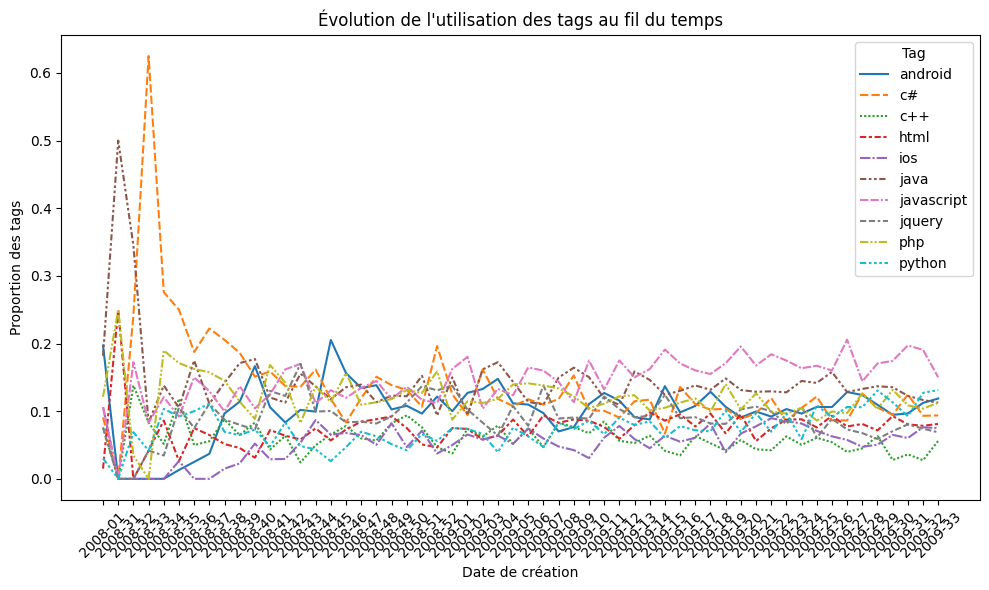

In [9]:
by_tag = questions.copy()
# print all CreationDate
print(by_tag['CreationDate'])

# year and month and week
by_tag['CreationDate'] = by_tag['CreationDate'].apply(lambda x: f"{pd.Timestamp(x).year}-{pd.Timestamp(x).isocalendar().week:02d}")
# by_tag['CreationDate'] = pd.to_datetime(by_tag['CreationDate']).dt
# Explode the tags
by_tag = by_tag.explode('Tag').reset_index()

unique_years = by_tag['CreationDate'].unique()
print("Unique years in the dataset:", unique_years)

# Keep only the tags that are in the top 10 most used tags
top_tags = by_tag['Tag'].value_counts().head(10).index
print("Top tags :", top_tags)

# tag_years = by_tag.groupby('Tag')['CreationDate'].unique()

# for tag, years in tag_years.items():
#     print(f"Tag: {tag}, Années: {sorted(years)}")


by_tag = by_tag[by_tag['Tag'].isin(top_tags)]

unique_years = by_tag['CreationDate'].unique()
print("Unique years in the dataset 2 :", unique_years)

by_tag = by_tag.groupby(['Tag', 'CreationDate']).size().reset_index(name='count')

unique_years = by_tag['CreationDate'].unique()
print("Unique years in the dataset 3 :", unique_years)

# display courbe of activity by tag
by_tag_pivot = by_tag.pivot(index='CreationDate', columns='Tag', values='count').fillna(0)

by_tag_normalized = by_tag_pivot.div(by_tag_pivot.sum(axis=1), axis=0)


plt.figure(figsize=(10, 6))
sns.lineplot(data=by_tag_normalized)
plt.title('Évolution de l\'utilisation des tags au fil du temps')
plt.xlabel('Date de création')
plt.ylabel('Proportion des tags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   Id  OwnerUserId  CreationDate ClosedDate  Score  \
0  80         26.0             4        NaN     26   
0  80         26.0             4        NaN     26   
0  80         26.0             4        NaN     26   
0  80         26.0             4        NaN     26   
0  80         26.0             4        NaN     26   

                                               Title  \
0  SQLStatement.execute() - multiple queries in o...   
0  SQLStatement.execute() - multiple queries in o...   
0  SQLStatement.execute() - multiple queries in o...   
0  SQLStatement.execute() - multiple queries in o...   
0  SQLStatement.execute() - multiple queries in o...   

                                                Body                    Tag  
0  <p>I've written a database generation script i...                   java  
0  <p>I've written a database generation script i...                windows  
0  <p>I've written a database generation script i...                    swt  
0  <p>I've written a datab

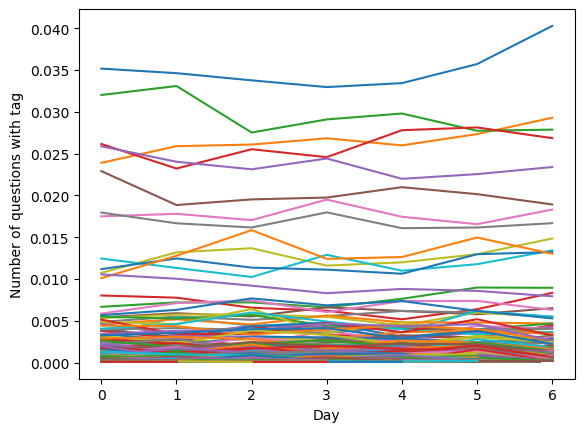

In [14]:
# Find best tag by day (0, 1? 2, 3, 4, 5, 6) 
questions_tmp = question_moy_norm_by_day.copy()
questions_tmp = questions_tmp.explode('Tag')
print(questions_tmp.head())
# Group by day count each tag
questions_tmp = questions_tmp.groupby(['CreationDate', 'Tag']).size().reset_index(name='counts')
# Find proportion of each tag by day
questions_tmp['counts'] = questions_tmp['counts'] / questions_tmp.groupby('CreationDate')['counts'].transform('sum')
print(questions_tmp.head())

# Sort by day and count
questions_tmp = questions_tmp.sort_values(by=['CreationDate', 'counts'], ascending=False)
print(questions_tmp.head())
# for day, create lign for tag
for tag in questions_tmp['Tag'].unique():
    ax = questions_tmp[questions_tmp['Tag'] == tag].set_index('CreationDate')['counts'].plot()
ax.set_xlabel('Day')
ax.set_ylabel('Number of questions with tag')

plt.show()

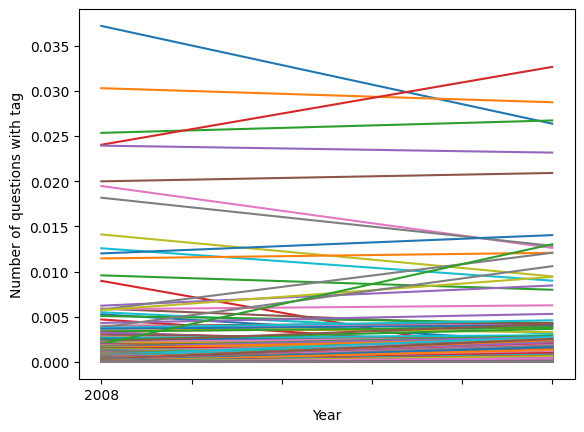

In [15]:
# See evolution of tag by years
questions_tmp = questions.copy()
questions_tmp['CreationDate'] = questions_tmp['CreationDate'].str[:4]
questions_tmp = questions_tmp.explode('Tag')
questions_tmp = questions_tmp.groupby(['CreationDate', 'Tag']).size().reset_index(name='counts')
# Normalize tag by year
questions_tmp['counts'] = questions_tmp['counts'] / questions_tmp.groupby('CreationDate')['counts'].transform('sum')
questions_tmp = questions_tmp.sort_values(by=['CreationDate', 'counts'], ascending=False)
for tag in questions_tmp['Tag'].unique():
    ax = questions_tmp[questions_tmp['Tag'] == tag].set_index('CreationDate')['counts'].plot()
ax.set_xlabel('Year')
ax.set_ylabel('Number of questions with tag')
plt.show()

In [16]:
# See graphique user activity by hour
answers_tmp = answers.copy()
# Groupe by user and hour count response
answers_tmp['CreationDate'] = answers_tmp['CreationDate'].str[11:13]
answers_tmp = answers_tmp.groupby(['OwnerUserId', 'CreationDate']).size().reset_index(name='counts')
print(answers_tmp.head())


   OwnerUserId CreationDate  counts
0          1.0           02       1
1          1.0           03       2
2          1.0           05       1
3          1.0           06       1
4          1.0           08       4


In [17]:
# In y we have each user
# In x we have each hour
# We display % of activity by user
answers_tmp['counts'] = answers_tmp['counts'] / answers_tmp.groupby('OwnerUserId')['counts'].transform('sum')
print(answers_tmp.head())

# To verify
# print(answers_tmp.groupby('OwnerUserId').sum('counts'))

import seaborn as sns





   OwnerUserId CreationDate    counts
0          1.0           02  0.076923
1          1.0           03  0.153846
2          1.0           05  0.076923
3          1.0           06  0.076923
4          1.0           08  0.307692
